# Prestige Bias model
## Influence included

In [187]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
m = 1000 # number of generation
N = 1000 # generation size

def generate_traits(correlation = 0,std = 1):
    means = [0,0]
    cov = [[std**2,correlation],
           [correlation,std**2]]
    return np.random.multivariate_normal(means, cov, size=N).T

A,B = generate_traits(correlation = 0.85)
print(f'A.shape = {A.shape}\t\tB.shape = {B.shape}')

A.shape = (1000,)		B.shape = (1000,)


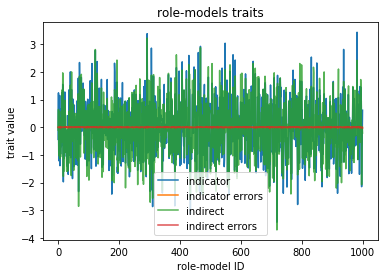

In [189]:
plt.plot(A,label='indicator')
plt.plot(E_A,label='indicator errors')
plt.plot(B,alpha=0.8,label='indirect')
plt.plot(E_B,alpha=0.8,label='indirect errors')
plt.xlabel('role-model ID')
plt.ylabel('trait value')
plt.title('role-models traits')
plt.legend()
plt.show()

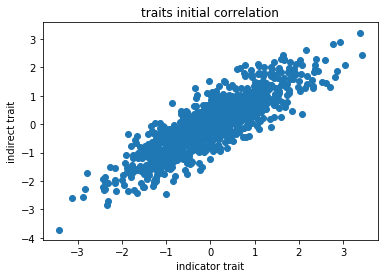

In [190]:
plt.scatter(A,B)
plt.title('traits initial correlation')
plt.xlabel('indicator trait')
plt.ylabel('indirect trait')
plt.show()

In [191]:
b,J = 1,0.5
A_hat = 1
alpha = 0.5

print(f'b={b}\tJ={J}\tA_hat={A_hat}\talpha={alpha:.2f}')


b=1	J=0.5	A_hat=1	alpha=0.50


In [192]:
def bias(indicator_traits):
    return b * np.exp(-(((A_hat - indicator_traits) ** 2) / (2 * J)))

def get_generation_data(gen,A_,B_):
    return pd.DataFrame([[gen,'Indicator',A_.mean(),A_.std(),A_.var()],
                         [gen,'Indirect',B_.mean(),B_.std(),B_.var()]],
                        columns = df_columns)
    
df_columns = ['Generation','Type','Mean','Std','Variance']
df = pd.DataFrame(columns=df_columns)


# fully iterative dependant model. No approximations are made
copiers = np.random.rand(N,N)

In [193]:
m = 1000
A_ = A.copy()
B_ = B.copy()
for i in range(m):
    E_A,E_B = generate_traits(std = 0.01)
    estimated_A = A_.reshape(-1,1) + E_A
    estimated_B = B_.reshape(-1,1) + E_B
    biased_A = bias(estimated_A)*alpha
    K = np.zeros(N)
    new_A,new_B = [],[]
    for j in range(N):
        current_biased_A = biased_A[:,j]
        prestige = current_biased_A + (1-alpha)*K
        prestige /= prestige.sum()
        chosen_role_model = np.searchsorted(prestige.cumsum(),copiers[i][j])
        K[chosen_role_model] += 1
        new_A.append(A_[chosen_role_model])
        new_B.append(B_[chosen_role_model])
    A_ = np.array(new_A)
    B_ = np.array(new_B)
    generation_data = get_generation_data(i+1,A_,B_)
    
    df = df.append(generation_data, ignore_index=True)
      
df.tail()      

,Generation,Type,Mean,Std,Variance
1995,998,Indirect,1.032473,2.220446e-16,4.930381e-32
1996,999,Indicator,1.053444,2.220446e-16,4.930381e-32
1997,999,Indirect,1.032473,2.220446e-16,4.930381e-32
1998,1000,Indicator,1.053444,2.220446e-16,4.930381e-32
1999,1000,Indirect,1.032473,2.220446e-16,4.930381e-32


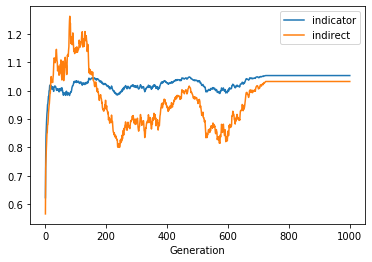

In [194]:
indicators = df[df['Type'] == 'Indicator']
indirects = df[df['Type'] == 'Indirect']
fig, ax = plt.subplots()
indicators.plot(x='Generation',y='Mean',label='indicator',ax=ax)
indirects.plot(x='Generation',y='Mean',label='indirect',ax=ax)

In [195]:
df = pd.DataFrame(columns=df_columns)

m = 1000
A_ = A.copy()
B_ = B.copy()
for i in range(m):
    biased_A = bias(A_)*alpha
    
    dist = np.random.dirichlet(biased_A,N).cumsum(axis=1)
    indices = np.argmax(dist>copiers[i],axis=1)
    K = np.zeros(N)
    np.add.at(K,indices,1)
    
    
    E_A,E_B = generate_traits(std = 0.01)
    estimated_A = A_.reshape(-1,1) + E_A
    estimated_B = B_.reshape(-1,1) + E_B
    
    generation_data = get_generation_data(i+1,A_,B_)
    
    df = df.append(generation_data, ignore_index=True)
      
df.tail()   

NameError: name 'gen_size' is not defined